In [1]:
import pandas as pd

# Load the data from the uploaded CSV file
file_path = "C:/Users/HP/Downloads/icecream (1).csv"
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
data.head()


,Brand,Price,Availability,Taste,Flavour,Consistency,Shelflife
0,Amul,4,5,4,3,4,3
1,Nandini,3,2,3,2,3,3
2,Vadilal,2,2,4,3,4,4
3,Vijaya,3,1,3,5,3,4
4,Dodla,3,3,3,4,4,3


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Select numerical columns for MDS (excluding 'Brand')
numerical_data = data.drop(columns=['Brand'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Apply Multidimensional Scaling (MDS)
mds = MDS(n_components=2, random_state=0)
mds_coordinates = mds.fit_transform(scaled_data)

# Convert MDS results into a DataFrame for easier plotting and interpretation
mds_df = pd.DataFrame(mds_coordinates, columns=['Dimension 1', 'Dimension 2'])
mds_df['Brand'] = data['Brand']

# Display the resulting coordinates
mds_df.head()


D:\anaconda\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


,Dimension 1,Dimension 2,Brand
0,-2.881431,-0.864819,Amul
1,0.527117,-1.737547,Nandini
2,0.144046,1.965858,Vadilal
3,2.572981,0.405405,Vijaya
4,-1.046150,-0.382993,Dodla


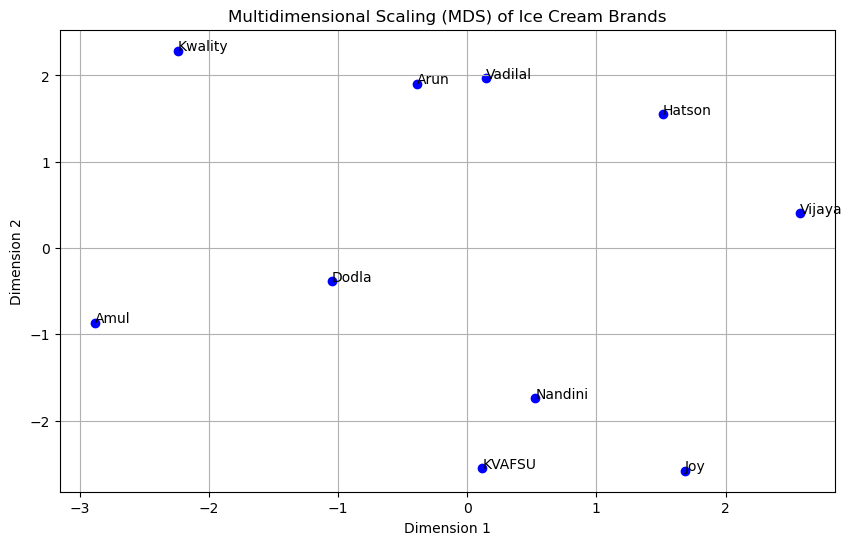

In [3]:
# Plot the MDS results
plt.figure(figsize=(10, 6))
plt.scatter(mds_df['Dimension 1'], mds_df['Dimension 2'], color='blue')

# Annotate points with brand names
for i in range(len(mds_df)):
    plt.text(mds_df.loc[i, 'Dimension 1'], mds_df.loc[i, 'Dimension 2'], mds_df.loc[i, 'Brand'])

plt.title('Multidimensional Scaling (MDS) of Ice Cream Brands')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()
